# 課題：ファインチューニングの実装
* データ：CIFAR-10の飛行機と自動車の画像
* モデル：VGG16（ImageNetで学習したパラメータを使用）

　　→　訓練するのはVGG16の一部と追加した全結合層

* データを拡張させ学習し、推移を描画

In [ ]:
#ドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#　モジュールをインポート
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
sys.version, tf.__version__
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator

## データ：CIFAR-10
今回は飛行機と自動車の画像のみ使用（前処理も施す）

* 注意：VGG16の入力は48x48以上のサイズである必要があるため、NumPyのrepeat関数でサイズを2倍に調整

余裕がある人はfor文を使って、ランダムに25枚表示してみる

In [ ]:
(X_train, t_train), (X_test, t_test) = cifar10.load_data()

In [ ]:
# floatに型変換


# 各画素値を 0-1 に正規化


In [ ]:
# ラベルが0と1のデータのみ取り出す
t_train = t_train.reshape(-1)
t_test = t_test.reshape(-1)
X_train = X_train[t_train <= 1]
t_train = t_train[t_train <= 1]
X_test = X_test[t_test <= 1]
t_test = t_test[t_test <= 1]

print("Original size:", X_train.shape)

Original size: (10000, 32, 32, 3)


In [ ]:
# 画像のサイズを2倍に調整。repest関数を使用

print("Input size:", X_train.shape)

Input size: (10000, 64, 64, 3)


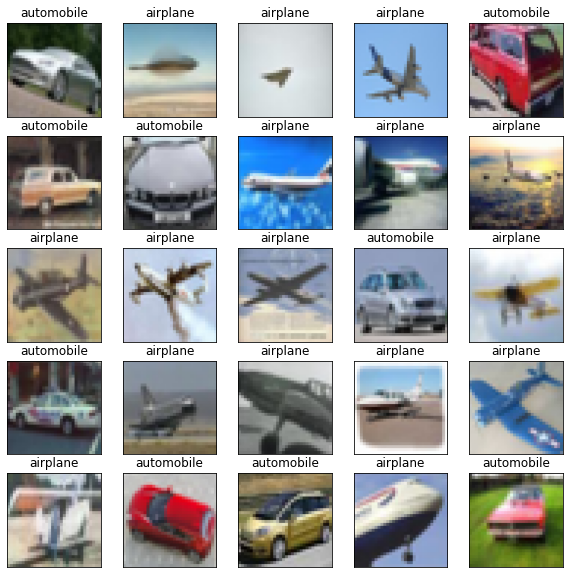

In [ ]:
#　25枚の画像をランダムに表示（余裕がある人）

n_image = 25
rand_idx = np.random.randint(0, len(x_train), n_image)
cifar10_labels = np.array(["airplane", "automobile"])
plt.figure(figsize=(10,10))  # 画像の表示サイズ
for i in range(n_image):
  

## VGG16
ImageNetを使って訓練済みのモデルであるVGG16をkeras.applicationsから導入（ただし、全結合層は含まない）
https://keras.io/ja/applications/#vgg16

In [ ]:
#　VGG16の導入
model_vgg16 = 

model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

## モデルの構築
導入したVGG16に全結合層を追加 

block5にある複数の畳み込み層のみを訓練可能に設定し、VGG16 の一部と全結合層を訓練する
* 中間層の値は1024、ドロップアウトの値は0.5、最適化アルゴリズムはAdamに設定


In [ ]:
# 導入したVGG16の準備


#　全結合層を追加



# block5のみ訓練する
for layer in model_vgg16.layers:
    if layer.name.startswith(""):
        layer.trainable = 
    else:
        layer.trainable = 

#　モデルをコンパイル
adam = Adam()

model.compile()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 activation_2 (Activation)   (None, 1024)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
 activation_3 (Activation)   (None, 1)                

## データを拡張し、学習
* 回転角度、水平シフト、垂直シフト、ズームの値：0.2
* 引き伸ばし（シアー強度）：0.1
* 水平方向に反転

  https://keras.io/ja/preprocessing/image/　
* バッチサイズ：32、エポック：10 に設定

In [ ]:
# データ拡張
generator = ImageDataGenerator(
    
)
generator.fit(X_train)

# 訓練
history = model.fit_generator(
    
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
313/313 [==============================] - 352s 1s/step - loss: 0.3150 - accuracy: 0.8950 - val_loss: 0.0925 - val_accuracy: 0.9650
Epoch 2/10
313/313 [==============================] - 350s 1s/step - loss: 0.1253 - accuracy: 0.9564 - val_loss: 0.0796 - val_accuracy: 0.9670
Epoch 3/10
313/313 [==============================] - 351s 1s/step - loss: 0.1247 - accuracy: 0.9591 - val_loss: 0.1128 - val_accuracy: 0.9670
Epoch 4/10
313/313 [==============================] - 351s 1s/step - loss: 0.1107 - accuracy: 0.9640 - val_loss: 0.0634 - val_accuracy: 0.9785
Epoch 5/10
313/313 [==============================] - 351s 1s/step - loss: 0.0970 - accuracy: 0.9642 - val_loss: 0.0478 - val_accuracy: 0.9825
Epoch 6/10
313/313 [==============================] - 351s 1s/step - loss: 0.0869 - accuracy: 0.9687 - val_loss: 0.0514 - val_accuracy: 0.9815
Epoch 7/10
313/313 [==============================] - 350s 1s/step - loss: 0.0786 - accuracy: 0.9710 - val_loss: 0.0629 - val_accuracy: 0.9815

## 学習の推移を可視化
matplotlibとhistoryを使って、訓練用データ・検証用データそれぞれの誤差と精度を確認

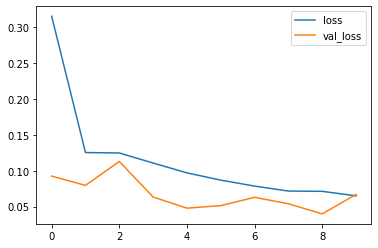

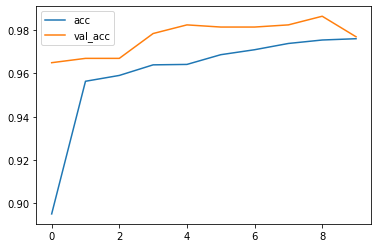

In [ ]:
train_loss =      # 訓練用データの誤差
train_acc =       # 訓練用データの精度
val_loss =        # 検証用データの誤差
val_acc =         # 検証用データの精度

# 損失を描画


#　精度を描画


# 余力がある人は挑戦
* CIFAR-10を10クラス分類してみる

  https://qiita.com/kotai2003/items/e85f17d7213cf84e3bcd

* CIFAR-10以外の画像でクラス分類してみる

  呪術廻戦のキャラ分類（https://github.com/RyuseiInamori/jyujyutu_VGG ）

